# Database Connection Check - AWS

- [Sentinel-2 Cloud Cover Segmentation Dataset](https://source.coop/repositories/radiantearth/cloud-cover-detection-challenge/description)

In [18]:
%%bash
aws configure list

      Name                    Value             Type    Location
      ----                    -----             ----    --------
   profile                <not set>             None    None
access_key     ****************M36H shared-credentials-file    
secret_key     ****************yvE3 shared-credentials-file    
    region                us-east-1      config-file    ~/.aws/config


In [19]:
%%bash
AWS_SOURCE=s3://radiantearth/cloud-cover-detection-challenge/documentation.pdf
aws s3 cp $AWS_SOURCE . --endpoint-url=https://data.source.coop

download: s3://radiantearth/cloud-cover-detection-challenge/documentation.pdf to ./documentation.pdf


In [23]:
%%bash

AWS_SOURCE_1=s3://radiantearth/cloud-cover-detection-challenge/final/public/train_metadata.csv
AWS_SOURCE_2=s3://radiantearth/cloud-cover-detection-challenge/final/private/test_metadata.csv

for variable in $AWS_SOURCE_1 $AWS_SOURCE_2
do 
    aws s3 cp $variable . --endpoint-url=https://data.source.coop
done

download: s3://radiantearth/cloud-cover-detection-challenge/final/public/train_metadata.csv to ./train_metadata.csv
download: s3://radiantearth/cloud-cover-detection-challenge/final/private/test_metadata.csv to ./test_metadata.csv


# Create the list of file!

1 Sample Size: 2307.8 KB  = 256.6 (Mask) + 512.8 (Band2) + 512.8 (Band3) + 512.8 (Band4) + 512.8 (Band8)

Training Data Total Size: 26 GB = 11748 ea x 2307.8 KB

Test Data Total Size: 24 GB = 10980 ea x 2307.8 KB

## EDA - Original dataset

In [134]:
import pandas as pd

In [135]:
train_df = pd.read_csv('./train_metadata.csv')
test_df = pd.read_csv('./test_metadata.csv')

print(len(train_df), len(test_df))

11748 10980


In [136]:
train_df.head()

,chip_id,location,datetime,cloudpath
0,adwp,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwp
1,adwu,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwu
2,adwz,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adwz
3,adxp,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/adxp
4,aeaj,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/aeaj


<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

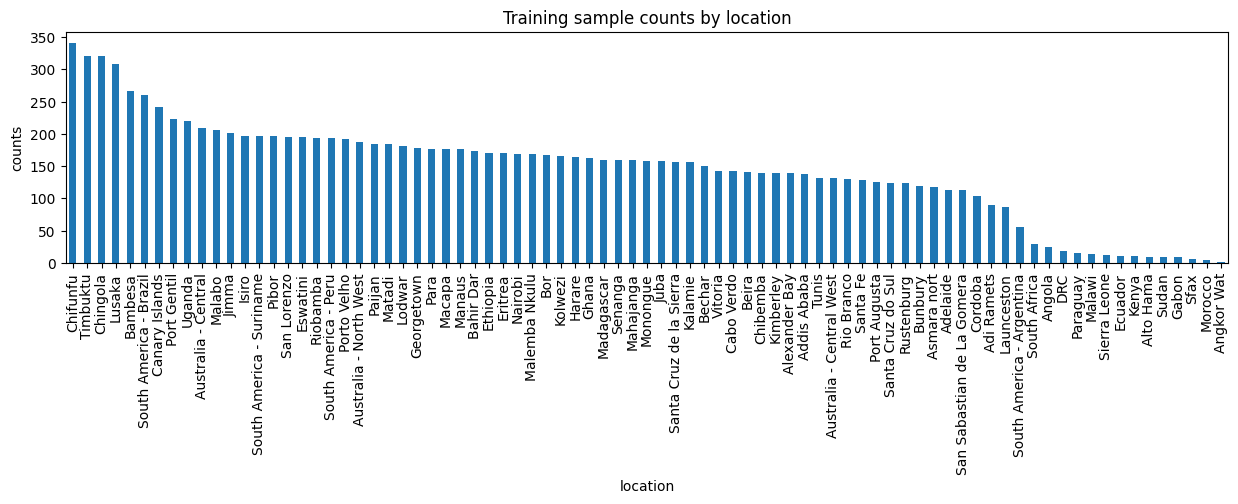

In [137]:
train_by_loc = train_df.groupby('location').count()
train_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', 
                                                          ylabel='counts', title='Training sample counts by location')

In [138]:
test_df.head()

,chip_id,location,datetime
0,aaaa,Australia - Central East,2020-06-03T00:55:26Z
1,aaay,Australia - Central East,2020-06-03T00:55:26Z
2,aabb,Australia - Central East,2020-06-03T00:55:26Z
3,aabd,Australia - Central East,2020-06-03T00:55:26Z
4,aabl,Australia - Central East,2020-06-03T00:55:26Z


<Axes: title={'center': 'Test sample counts by location'}, xlabel='location', ylabel='counts'>

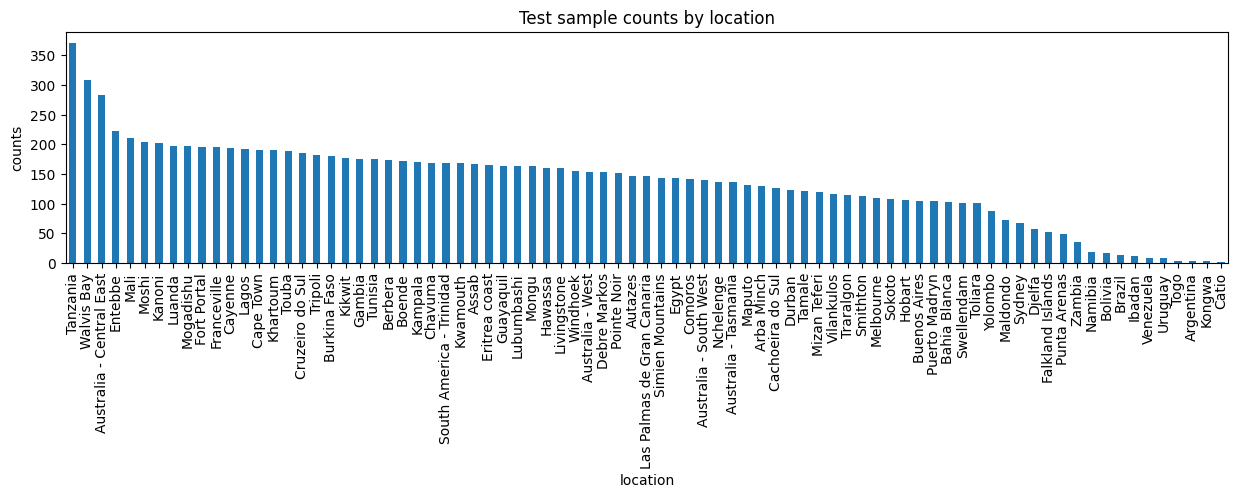

In [139]:
test_by_loc = test_df.groupby('location').count()
test_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar',
                                                         ylabel='counts', title='Test sample counts by location')

## Random Sampling

- train : 585 samples (5% Random by loc)
- test : 547 samples (5% Random by loc)

In [179]:
SAMPLE_RATE = 0.002

In [180]:
train_id_mask = train_df.groupby("location")["chip_id"].sample(frac=SAMPLE_RATE, random_state=42)
test_id_mask = test_df.groupby("location")["chip_id"].sample(frac=SAMPLE_RATE, random_state=42)

print(len(train_id_mask), len(test_id_mask))

6 3


In [181]:
s_train_df = train_df.loc[train_id_mask.index].sort_values('chip_id')
s_train_df.head()


,chip_id,location,datetime,cloudpath
135,ahtj,Chifunfu,2020-04-29T08:20:47Z,az://./train_features/ahtj
1583,crmb,Chingola,2020-05-07T08:33:36Z,az://./train_features/crmb
3176,gpqp,Bambesa,2020-08-11T08:49:31Z,az://./train_features/gpqp
3521,htcz,South America - Brazil,2020-09-06T15:02:37Z,az://./train_features/htcz
7320,rcct,Lusaka,2020-08-22T08:24:41Z,az://./train_features/rcct


In [182]:
s_test_df = test_df.loc[test_id_mask.index].sort_values('chip_id')
s_test_df.head()

,chip_id,location,datetime
118,advd,Australia - Central East,2020-06-03T00:55:26Z
5144,lljy,Walvis Bay,2019-11-06T09:17:02Z
9701,vlfv,Tanzania,2020-09-10T08:00:28Z


<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

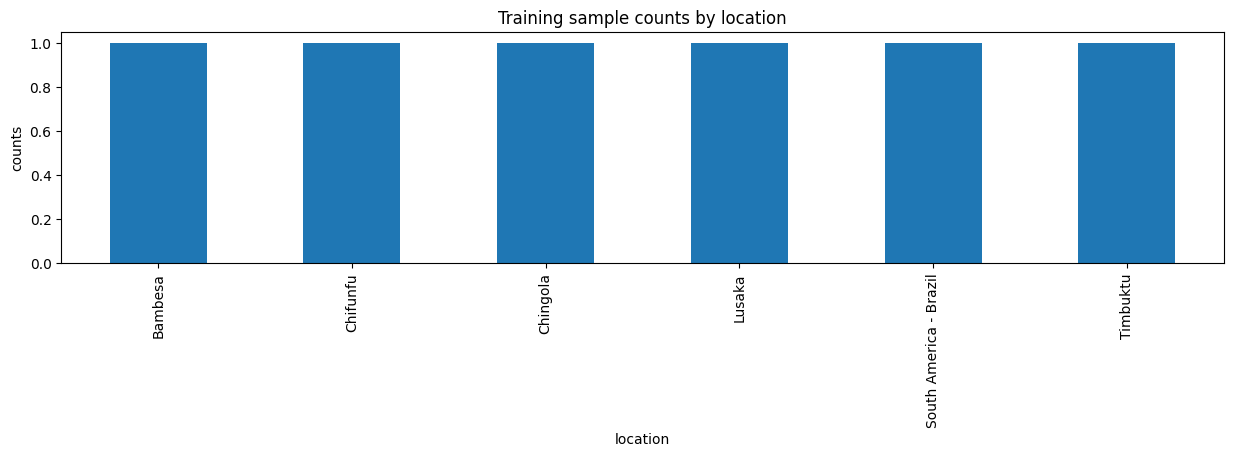

In [183]:
s_train_by_loc = s_train_df.groupby('location').count()
s_train_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', 
                                                          ylabel='counts', title='Training sample counts by location')

<Axes: title={'center': 'Training sample counts by location'}, xlabel='location', ylabel='counts'>

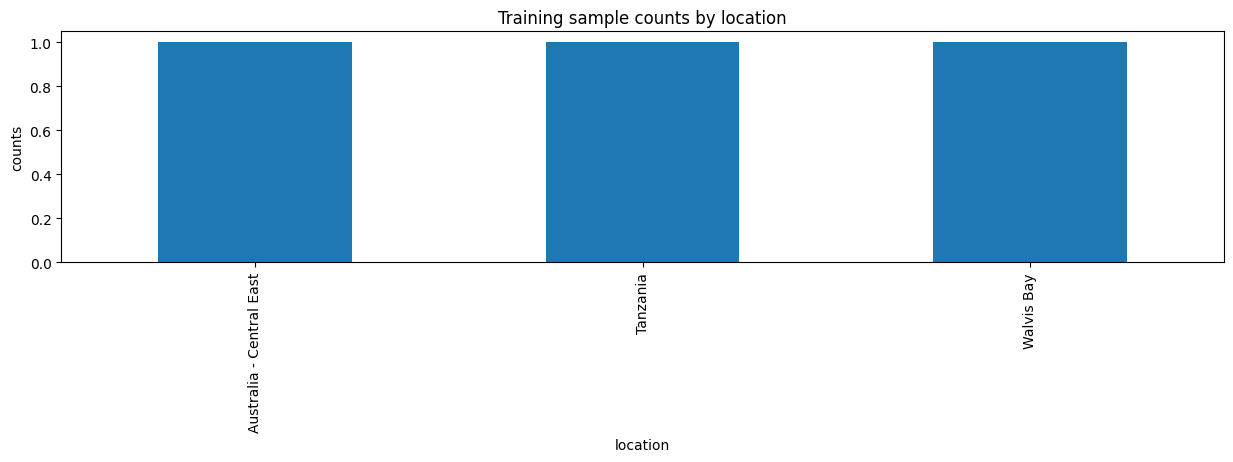

In [184]:
s_test_by_loc = s_test_df.groupby('location').count()
s_test_by_loc['chip_id'].sort_values(ascending=False).plot(figsize=(15,3), kind='bar', 
                                                          ylabel='counts', title='Training sample counts by location')

In [185]:
s_train_df.to_csv('s_train_metadata.csv', index=False)
s_test_df.to_csv('s_test_metadata.csv', index=False)

# Create Small Dataset

In [199]:
%%bash

mkdir -p ./Small_S2_CloudCover_Seg/public/train_features
mkdir -p ./Small_S2_CloudCover_Seg/public/train_labels
mkdir -p ./Small_S2_CloudCover_Seg/private/test_features
mkdir -p ./Small_S2_CloudCover_Seg/private/test_labels

In [201]:
%%bash

SKIP_HEADERS=1
DST_ROOT=./Small_S2_CloudCover_Seg/public
while IFS=, read -r col1 col2
do
    if ((SKIP_HEADERS))
    then
        ((SKIP_HEADERS--))
    else

        # Download Features
        AWS_SOURCE_FEATURE=s3://radiantearth/cloud-cover-detection-challenge/final/public/train_features/$col1
        aws s3 cp $AWS_SOURCE_FEATURE $DST_ROOT/train_features/$col1 --recursive --endpoint-url=https://data.source.coop 

        # Download Labels
        AWS_SOURCE_LABEL=s3://radiantearth/cloud-cover-detection-challenge/final/public/train_labels/$col1.tif
        aws s3 cp $AWS_SOURCE_LABEL $DST_ROOT/train_labels --endpoint-url=https://data.source.coop

    fi
done < s_train_metadata.csv

download: s3://radiantearth/cloud-cover-detection-challenge/final/public/train_features/ahtj/B08.tif to Small_S2_CloudCover_Seg/public/train_features/ahtj/B08.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/public/train_features/ahtj/B03.tif to Small_S2_CloudCover_Seg/public/train_features/ahtj/B03.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/public/train_features/ahtj/B02.tif to Small_S2_CloudCover_Seg/public/train_features/ahtj/B02.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/public/train_features/ahtj/B04.tif to Small_S2_CloudCover_Seg/public/train_features/ahtj/B04.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/public/train_labels/ahtj.tif to Small_S2_CloudCover_Seg/public/train_labels/ahtj.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/public/train_features/crmb/B02.tif to Small_S2_CloudCover_Seg/public/train_features/crmb/B02.tif
download: s3://radiantearth/cloud-

In [202]:
%%bash

SKIP_HEADERS=1
DST_ROOT=./Small_S2_CloudCover_Seg/private
while IFS=, read -r col1 col2
do
    if ((SKIP_HEADERS))
    then
        ((SKIP_HEADERS--))
    else

        # Download Features
        AWS_SOURCE_FEATURE=s3://radiantearth/cloud-cover-detection-challenge/final/private/test_features/$col1
        aws s3 cp $AWS_SOURCE_FEATURE $DST_ROOT/test_features/$col1 --recursive --endpoint-url=https://data.source.coop 

        # Download Labels
        AWS_SOURCE_LABEL=s3://radiantearth/cloud-cover-detection-challenge/final/private/test_labels/$col1.tif
        aws s3 cp $AWS_SOURCE_LABEL $DST_ROOT/test_labels --endpoint-url=https://data.source.coop

    fi
done < s_test_metadata.csv

download: s3://radiantearth/cloud-cover-detection-challenge/final/private/test_features/advd/B03.tif to Small_S2_CloudCover_Seg/private/test_features/advd/B03.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/private/test_features/advd/B08.tif to Small_S2_CloudCover_Seg/private/test_features/advd/B08.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/private/test_features/advd/B02.tif to Small_S2_CloudCover_Seg/private/test_features/advd/B02.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/private/test_features/advd/B04.tif to Small_S2_CloudCover_Seg/private/test_features/advd/B04.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/private/test_labels/advd.tif to Small_S2_CloudCover_Seg/private/test_labels/advd.tif
download: s3://radiantearth/cloud-cover-detection-challenge/final/private/test_features/lljy/B08.tif to Small_S2_CloudCover_Seg/private/test_features/lljy/B08.tif
download: s3://radiantearth/cloud-